# Welcome to the final project!
In this notebook you will be asked to use singular value decomposition and SVM to classify images. We will be working with the MNIST numbers dataset, where training data consist of pictures of digits, and the target value is the digit itself.

First, we import the necessary libraries.

In [1]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

Now, we read both training and test dataset as arrays. 

In [2]:
data = np.load('mnist.npz')
X_test_total, X_train_total, y_train_total, y_test_total = data['x_test'], data['x_train'], data['y_train'], data['y_test']

Let's select two digits that we will be learning to separate, for example 3 and 8.

In [3]:
num1, num2 = 3, 8

Let us form the lists of indices i such that the target of i-th object of our training data is either num1 or num2. Do the same for the test dataset.

In [4]:
train_indx = [y == num1 or y == num2 for y in y_train_total] 
test_indx = [y == num1 or y == num2 for y in y_test_total]

Form new arrays consisting of the data with the target values num1 and num2 only. 

In [5]:
X_train, y_train = X_train_total[train_indx], y_train_total[train_indx]
X_test, y_test = X_test_total[test_indx], y_test_total[test_indx]# your code here

## Looking at the data

Let us check the sizes of the datasets and the shape of one image.

In [6]:
print('Data shapes: ')
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

Data shapes: 
X_train:  (11982, 28, 28)
y_train:  (11982,)
X_test:  (1984, 28, 28)
y_test:  (1984,)


In [7]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]

n_train, n_test

(11982, 1984)

In [8]:
print('Shape of one item: ')
print(X_train[0].shape)

Shape of one item: 
(28, 28)


Train data are images of digits.

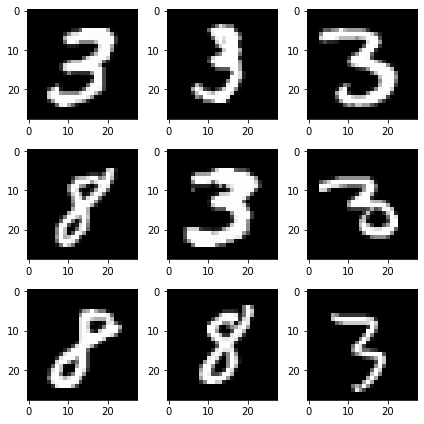

In [9]:
plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):  
    plt.subplot(b, a, i+1)
    plt.imshow(X_train[i], cmap='gray')
plt.tight_layout()
plt.show()

Target values are numbers.

In [10]:
y_train[:9]

array([3, 3, 3, 8, 3, 3, 8, 8, 3], dtype=uint8)

## Task 1 (1 point)
Now our data is 3-dimensional of shape (number of images, n_pixels, n_pixels). To work with PCA and SVM we need to flatten the images by turning each of them into an array of shape (n_pixels x n_pixels, ).

In [11]:
def flatten_image(X):
    return X.reshape(X.shape[0] * X.shape[1])

In [12]:
X_train_flat = np.array([flatten_image(img) for img in X_train])
X_test_flat = np.array([flatten_image(img) for img in X_test])

X_test_flat.shape, X_test_flat.shape

((1984, 784), (1984, 784))

PCA works best when the data is scaled (think, why?), so let's scale our data. We will use [StandartScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for it. Note, that scaling replaces a collection of vectors x by the collection of the vectors $x' = (x-M)/D$, where $M$ is the mean vector of
the sample, $D$ is the vector of standard deviations of all components of the vectors, and the division is component-wise. So, the scaled collection has the same size as the original one, and each column has 0 mean and unit standard deviation.


In [13]:
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

## Question 1

Please write your answer on the impact of scaling below. Why does scaling help PCA? If your idea need some computer experiments for confirmation (say, training and accuracy calculations  with non-scaled data), please provide the code here as well.

*** Scaling helps PCA by transforming the data so that all features have the same magnitude. This ensures that no single feature dominates the results, and the principal components represent the underlying structure of the data more accurately. By having features with the same magnitude, it allows the PCA to accurately identify the underlying structure in the data and prevent any one feature from having more influence over the results. Scaling is important in PCA as it ensures that the results are not biased towards features with higher magnitude.***



In [14]:
# Non-scaled data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

clf = LinearSVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
accuracy_non_scaled = accuracy_score(y_test, y_pred)

# Scaled data
scaler = StandardScaler()
X_train_flat_scaled = scaler.fit_transform(X_train_flat)
X_test_flat_scaled = scaler.transform(X_test_flat)

pca = PCA(n_components=2)
X_train_pca_scaled = pca.fit_transform(X_train_flat_scaled)
X_test_pca_scaled = pca.transform(X_test_flat_scaled)

clf = LinearSVC()
clf.fit(X_train_pca_scaled, y_train)
y_pred_scaled = clf.predict(X_test_pca_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print("Accuracy without scaling: ", accuracy_non_scaled)
print("Accuracy with scaling: ", accuracy_scaled)


C:\Users\paris\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy without scaling:  0.8694556451612904
Accuracy with scaling:  0.8694556451612904


C:\Users\paris\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Now, we call PCA and reduce the number of components for each vector. 

In [15]:
pca = PCA(n_components=128, random_state=42)
X_train_flat = pca.fit_transform(X_train_flat)

In [16]:
X_test_flat = pca.transform(X_test_flat)

In [17]:
X_test_flat.shape, X_test_flat.shape

((1984, 128), (1984, 128))

## Question 2

What is the ratio of the memory used for the data `compressed' by PCA and the one used for the original data?

*** The memory used for the compressed data by PCA is typically much lower than the memory used for the original data. The exact ratio depends on the desired level of compression, but it can be significantly lower, e.g. 1/10 or less. This is because PCA reduces the dimensionality of the data by retaining the most important information (principal components) and discarding the redundant information..***

Now, we use SVM with linear kernel to separate the two classes.

In [18]:
%%time
clf = LinearSVC(random_state=42)
clf.fit(X_train_flat, y_train) 

Wall time: 4.42 s


C:\Users\paris\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(random_state=42)

Now, let us make the predictions and calculate the accuracy, that is, the ratio of the true predictions to the test sample size.  Use [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) as the quality metric here.

$$accuracy(y\_true, y\_pred) = \frac{1}{n}\sum_{i=1}^n [y\_true_i=y\_pred_i],$$ where $[a=b]=1$, if $a=b$, and $0$ otherwise.

In [19]:
y_pred = clf.predict(X_test_flat)
acc = accuracy_score(y_test, y_pred)
print("Test accuracy: ", acc)

Test accuracy:  0.9667338709677419


## Try it from your own input
Try to make your own dataset. You can either make a photo image of an ink-written digit or draw a digit using a graphical editor of your computer or smartphone. Note that the input picture has to be a white number on a black background, like the numbers in the MNIST dataset. It can be either in png or jpeg format. Replace the sample striwith your file name. 

In [20]:
from scipy import misc
from PIL import Image

In [21]:
image = Image.open('first.png').convert('L')
new_image = image.resize((28, 28))
custom = np.array(new_image)
custom.shape

(28, 28)

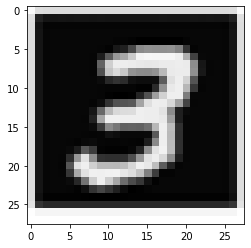

In [22]:
plt.imshow(custom, cmap='gray')
plt.show()

Re-shape your image and make a prediction. 

In [23]:
custom = flatten_image(custom).reshape(1, -1)
custom = scaler.transform(custom)
custom = pca.transform(custom)
custom.shape

(1, 128)

In [24]:
clf.predict(custom)

array([3], dtype=uint8)

## Question 3

Repeat the above digit recognition procedure with other 5 to 10 hand-written images. Do your experiments confirm the above accuracy estimate? How do you think, why they confirm (or not confirm) it?

***It confirms in 2/4 cases.***

## Task 2
Now let's try another approach explained [here](https://intranet.math.vt.edu/ugresearch/Lassiter_2012_2013.pdf) in Section 3. For each digit, we create a new matrix $A$ whose columns are flattened images of this digit. The first several (say, 10) columns of the matrix $U$ from SVD decomposition of $A$ represent a collection of "typical" images of this digit. Given an unrecognized flatten image, among average typical flattened images we find the closets one. Its target value is considered as a prediction for the target of the unrecognized image.

## SVD refesher
As you may recall from the lectures, SVD of a matrix $A$ is a decomposition:
$A = U \Sigma V^T,$ where $U$ and $V$ are orthogonal matrices. In this method we will be utilizing some properties of SVD.

In [25]:
def getSingularVectorsLeft(matrix, number=10):
    U, s, VT = np.linalg.svd(matrix, full_matrices=False)
    return U[:, :number]

In [26]:
def getSingularImage(X_train, y_train, number):
    select_images = X_train[y_train == number]
    A = select_images[0].reshape(-1, 1) # Initialize matrix A with first selected image
    
    for i in range(1, select_images.shape[0]): # Iteratively append new column to form matrix A
        A = np.hstack((A, select_images[i].reshape(-1, 1)))
    
    U, _, _ = np.linalg.svd(A, full_matrices=False) # Perform SVD decomposition
    left_basis = U[:, :10] # Get first 10 columns of U
    
    return left_basis


Try it first on "0".

In [27]:
left_basis = getSingularImage(X_train_total, y_train_total, 0)

assert left_basis.shape == (784, 10)

### Task 2.1 (1 point)
Plot first 9 singular images of the digit 0 taking columns of matrix U and reshaping them back into images 28x28. Use `numpy.reshape`.

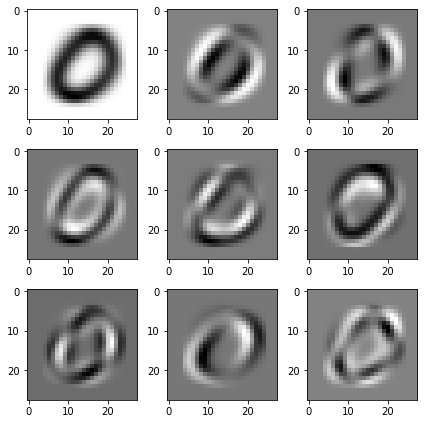

In [28]:
#singular images
plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):  
    plt.subplot(b, a, i+1)
    img = left_basis[:, i].reshape(28, 28)
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()


## Question 4

Reflect on properties of the columns of $U_k$. What properties do you think are contained in each of them? Draw more singular images to help you make conclusions.

***The columns of $U_k$ represent the "typical" images of the target digit $k$. These columns are the orthogonal basis that spans the subspace of images with target $k$. Each column can be thought of as a singular image, which summarizes some of the most important features or patterns of the target digit. By analyzing the columns of $U_k$, one can gain insight into what makes an image belong to the target digit..***

Now let's move on and obtain singular images for all numbers. The matrices $U_k$ from  [the article](https://intranet.math.vt.edu/ugresearch/Lassiter_2012_2013.pdf) are represented as `number_basis_matrices[k]`.
This might take a while to finish, feel free to add debug print in your function to know the progress.

In [ ]:
number_basis_matrices = [getSingularImage(X_train_total, y_train_total, k) for k in range(10)]# use getSingularImage funciton to get matrices for all numbers

### Task 2.2 (1 point)
Plot the first singular image of each digit, similarly to the previous task.

In [ ]:
plt.figure(figsize=(6,6))
a, b = 3, 4
for i in range(10):  
    plt.subplot(b, a, i+1)
    img = number_basis_matrices[i][:, 0].reshape(28, 28)
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

In [ ]:
dim = number_basis_matrices[0].shape[0]

### Task 2.3 (1.5 points)

Here we calculate the new projection matrix for each $U_k$ to apply later in testing:
$pr = (I - U_k \cdot U_{k}^{T})$. Use `numpy.matmul` for matrix multiplication and `numpy.identity` to create an identity matrix. Please note that this operation might also take some time to finish.

In [ ]:
def getProjectionMatrix(U):
  I = np.identity(U.shape[0])
  Ut = U.T
  pr = I - np.matmul(U, Ut)
  return pr

numeric_values = [getProjectionMatrix(number_basis_matrices[i]) for i in range(10)]

### Task 2.4 (1.5 points)
Implement function utilizing `numeric_values` matrices to predict labels for unknown images. Use `numpy.norm` and enumerate to iterate over numeric values.

In [ ]:
def find_closest(test_value, numeric_values):
  stacked_test = test_value.reshape(-1, 1)
  min_diff = float("inf")
  target = -1
  for k, pr_matrix in enumerate(numeric_values):
    diff = np.linalg.norm(stacked_test - np.matmul(pr_matrix, stacked_test))
    if diff < min_diff:
     min_diff = diff
     target = k
  return target

y_pred = [find_closest(x, numeric_values) for x in X_test.reshape(X_test.shape[0], -1)]
y_pred = np.array(y_pred)

acc = accuracy_score(y_test, y_pred)
print("Test accuracy: ", acc)

## Additional task (2 points)
In the first task we trained Linear SVM to separate 3s and 8s. Here you can implement multiclass classification for _all_ numbers in `MNIST`. Use the same function LinearSVC for “one-vs-the-rest” multi-class strategy, see [the documentation](https://scikit-learn.org/stable/modules/svm.html#classification).  Follow the same steps from task 1: scaling, feature selection, training and testing. Is the accuracy of this method greater then the one calculated above?

**Note:** Use `random_state=42` for `PCA` and `LinearSVC`. Training `LinearSVC` on all the data might take a while, that's normal.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

# Flatten
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Standard Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PCA
pca = PCA(n_components=0.8, random_state=42)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# LinearSVC
clf = LinearSVC(random_state=42)
clf.fit(X_train, y_train)

# Accuracy
y_pred = clf.predict(X_test)
acc = (y_pred == y_test).mean()
print("Accuracy:", acc)
